Assignment-2: Problems using Data Preprocessing 

Predicting Employee Exit

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('HR_comma_sep.csv.txt')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
data.rename(columns={'sales':'dept'}, inplace=True)

In [13]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
data.shape

(14999, 10)

In [19]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Preprocessing

In [24]:
data.select_dtypes('object').columns

Index(['dept', 'salary'], dtype='object')

In [26]:
data.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [30]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [32]:
le = LabelEncoder()

In [34]:
dept = le.fit_transform(data.dept)

In [36]:
ohe = OneHotEncoder()

In [38]:
ohe_dept = ohe.fit_transform(dept.reshape(-1,1))

In [40]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [42]:
dept_df = pd.DataFrame(ohe_dept.toarray(), dtype=int,columns=le.classes_)

In [44]:
data['salary_tf'] = data.salary.map({'low':1,'medium':2,'high':3})

In [52]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,salary_tf
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [54]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'salary_tf'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

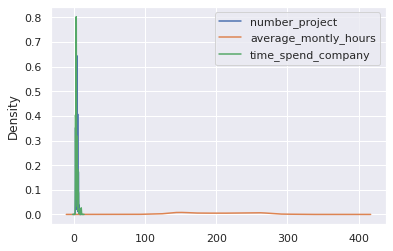

In [56]:
df = data[['number_project','average_montly_hours', 'time_spend_company']]
df.plot.kde()

In [58]:
mm = MinMaxScaler()

In [60]:
scaled_np = mm.fit_transform(df)

In [62]:
dept_np = dept_df.values

In [64]:
emp_df = data[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years','salary_tf']]

In [66]:
emp_np = emp_df.values

In [68]:
feature_data = np.hstack([emp_np, scaled_np, dept_np])

In [70]:
target_data = data.left

In [72]:
feature_data.shape

(14999, 18)

In [74]:
target_data.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Model Building

In [79]:
target_data.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [85]:
target_data.tail()

14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, dtype: int64

In [87]:
models = [ LogisticRegression(class_weight='balanced'), SGDClassifier(max_iter=10), PassiveAggressiveClassifier(max_iter=20), RandomForestClassifier(n_estimators=20)]

In [89]:
trainX,testX,trainY,testY = train_test_split(feature_data,target_data)

In [91]:
for model in models:
    model.fit(trainX,trainY)
    print (model.score(testX,testY))

0.7645333333333333
0.7856
0.7552


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9866666666666667
